In [2]:
import sys
sys.path.append('../')
import numpy as np
from utils.datasets import YoloDataset
from matplotlib import pyplot as plt
from utils.postprocess import DecodeBox
from PIL import Image, ImageDraw
%matplotlib widget

In [3]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [10]:
decode = DecodeBox([(32, 64), (15, 40)], [2], 5, (544, 544), (512, 512))
trainset = YoloDataset('../data/train_val.npy', (512, 512))
img, boxs, label = trainset[0]
b = boxs.copy()
a = decode.yolo2voc(b[:, [0, 1]], b[:, [2, 3]])
boxs[:, [0, 2]] *= img.shape[1]
boxs[:, [1, 3]] *= img.shape[0]

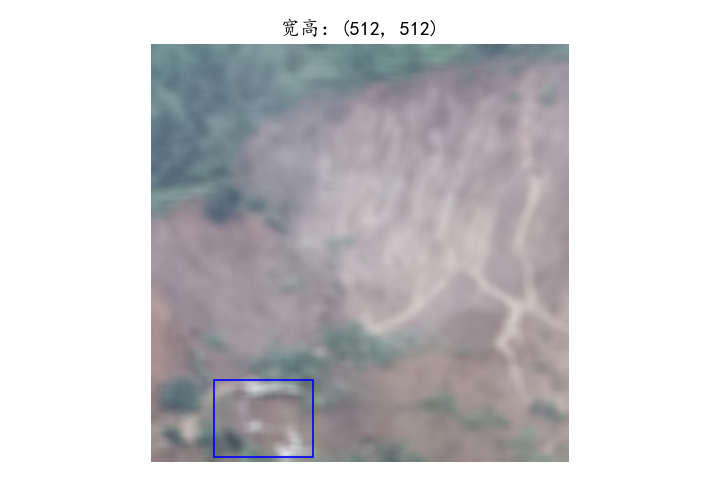

In [11]:
plt.close('绘制矩形框')
plt.figure(num='绘制矩形框', dpi=120)
plt.imshow(img)
for box in boxs:
    rect = plt.Rectangle((box[0]-box[2]/2, box[1]-box[3]/2), box[2], box[3], fill=False, color='blue', lw=1)
    plt.gca().add_patch(rect)
plt.title(f"宽高：{img.shape[:2]}", size=12, family='KaiTi')
plt.gca().set_axis_off()
plt.tight_layout()
plt.show()

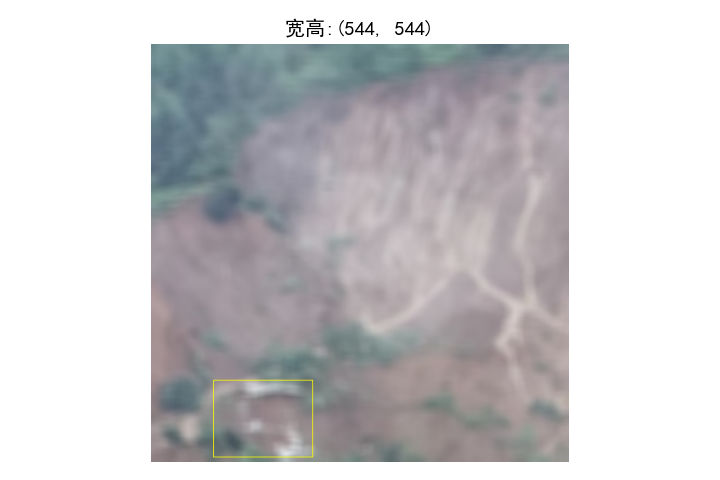

In [12]:
nimg = img * 255
orimg = Image.fromarray(nimg.astype(np.uint8), mode='RGB')
orimg = orimg.resize((544, 544))
xyxy = a.squeeze()
draw = ImageDraw.Draw(orimg)
draw.rectangle(xyxy.tolist(), outline='yellow')
plt.figure('还原', dpi=120)
plt.title(f'宽高:{orimg.size}')
plt.imshow(orimg)
plt.gca().set_axis_off()
plt.tight_layout()
plt.show()